<H1> Bike Sharing - Multi Linear Regression </H1>

<H3>Problem Statement:</H3>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

<H2>1. Importing relevant Libraries</H2>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

<H2> 2. Data understanding, preparation and EDA </H2>

In [11]:
bikeSharing = pd.read_csv(r"day.csv", sep=",")
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
bikeSharing.shape

(730, 16)

In [13]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [14]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<H3> Removing Irrelevant Independent Variables </H3>
Instand and dtedate are not useful variables for our analysis

In [15]:
#removing irrelevant independent variables - Instant & dtedat
bikeSharing = bikeSharing.drop(['instant','dteday'],axis=1)

<H3> Removing Intermediate Dependent variables </H3>

In [16]:
#Removing intermediate dependent variables - Registered and Casual.
#Reason: The objective is to predict cnt variable, so intermediate variables can be removed
bikeSharing = bikeSharing.drop(['registered','casual'],axis=1)

In [18]:
#Checking Null values
bikeSharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [21]:
#Outliers assessment
#Part-`1: How unique the values are for each variables
bikeSharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

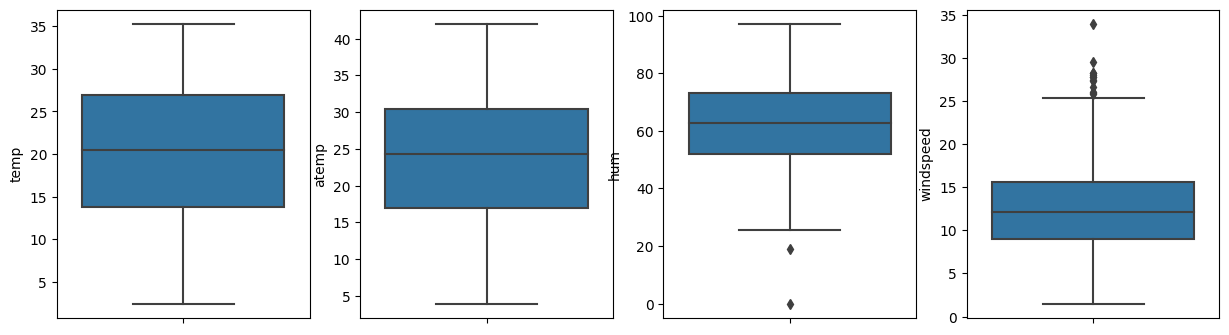

In [24]:
#Part-2: Range using box plot for continuous variables
cols = ['temp', 'atemp', 'hum','windspeed']
plt.figure(figsize=(15,4))
n=1
for col in cols:
  plt.subplot(1,4,n)
  sns.boxplot(y=col, data = bikeSharing)
  n = n+1
plt.show()

<font color ="blue"> <H4>Inferences</H4>
1. Temp and atemp follow similar range and only one of them can be used for further based on their correlation
2. hum starting range is above 20. There are just 2 outlier lesser to this range
3. Contrarily, windspeed ceiling is 25 beyond which there are 10+ outliers


<H3> EDA </H3>

<H4> Univariate Analysis</H4>

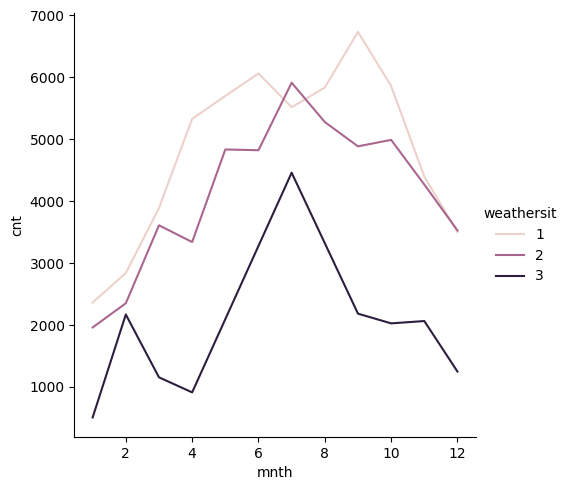

In [25]:
sns.relplot(data=bikeSharing, x='mnth', y='cnt', hue='weathersit',kind='line',errorbar=None)

<font color ="blue"> <H4>Inferences</H4>
1.Most of the booking happens during clear weather, followed by mist and light snow/rain weathers</br>
2.Bookings spike up during mid year then tapers off, again has some spikes in the year end holidays and then tapers off.
</font>

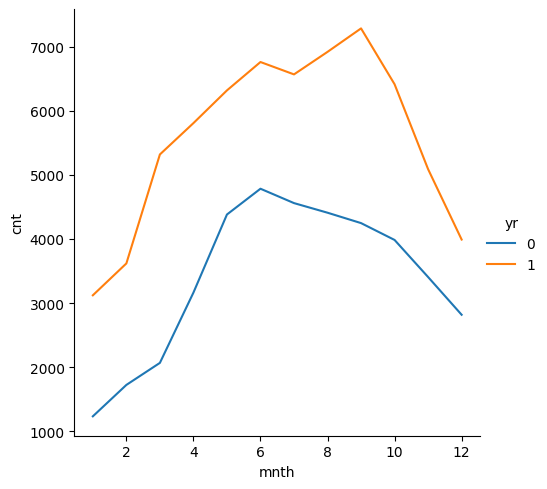

In [27]:
sns.relplot(x='mnth',y='cnt',data=bikeSharing,kind = 'line', hue='yr',errorbar=None)

<font color ="blue"> <H4>Inferences</H4>
Second year had higher booking over first year, implying the demand has picked up y/y
</font>

<H3> Treatment of Categorical variables </H3>

In [28]:
#Formatting numerical variables into categories based on data dictionary info
bikeSharing['season']=bikeSharing.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikeSharing['mnth']=bikeSharing.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikeSharing['weathersit']=bikeSharing.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})
bikeSharing['weekday']=bikeSharing.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [29]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


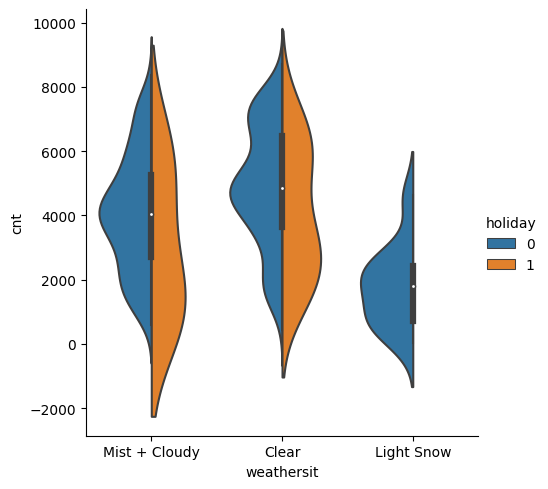

In [31]:
sns.catplot(data=bikeSharing,x='weathersit',y='cnt',kind='violin',hue='holiday',split=True)

<font color ="blue"> <H4>Inferences</H4>
1.Holiday has shown good average bookings during clear and misty/cloudy weather conditions </br>
2.During Light now, there were no bookings during holidays possibly because there could be no holidays
</font>

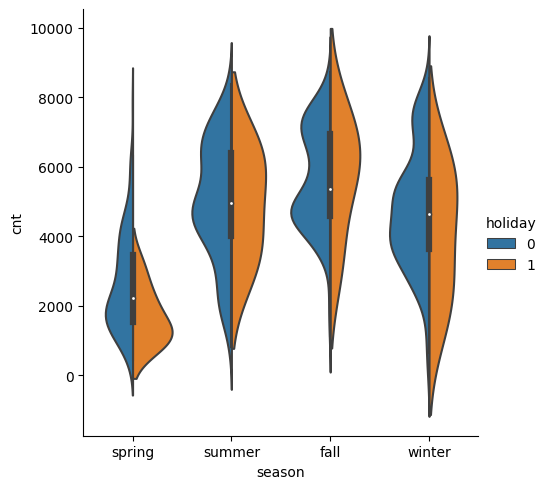

In [32]:
sns.catplot(data=bikeSharing, x='season',y='cnt',kind='violin',hue='holiday',split = True)

<font color ="blue"> <H4>Inferences</H4>
1.Interestengly winder has seen more spread on daily bookings</br>
2.Maximum booking has happened in a Holiday during fall.</br>
3.Spring has lesser number of booking during holidays compared to other seasons
</font>

<H3> Bivariate analysis </H3>

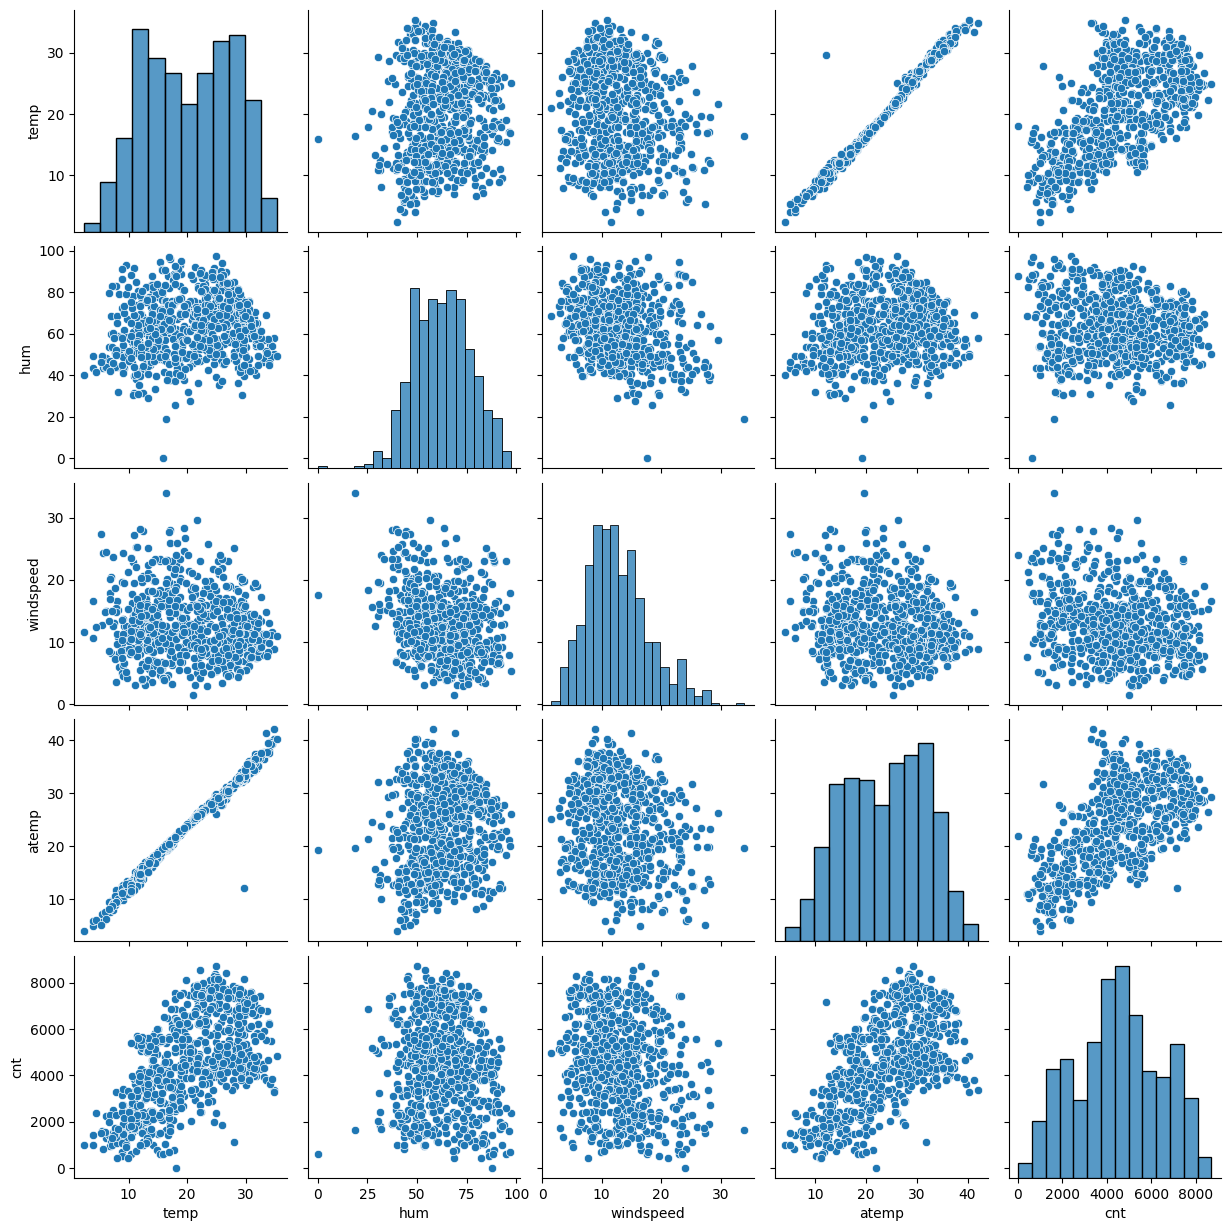

In [33]:
#Assessing relationship between available numeric variables
sns.pairplot(bikeSharing, vars=["temp", "hum",'windspeed','atemp','cnt'])
plt.show()

<font color ="blue"> <H4>Inferences</H4>
1.As expected, temp & atemp has strong correlation
</font>

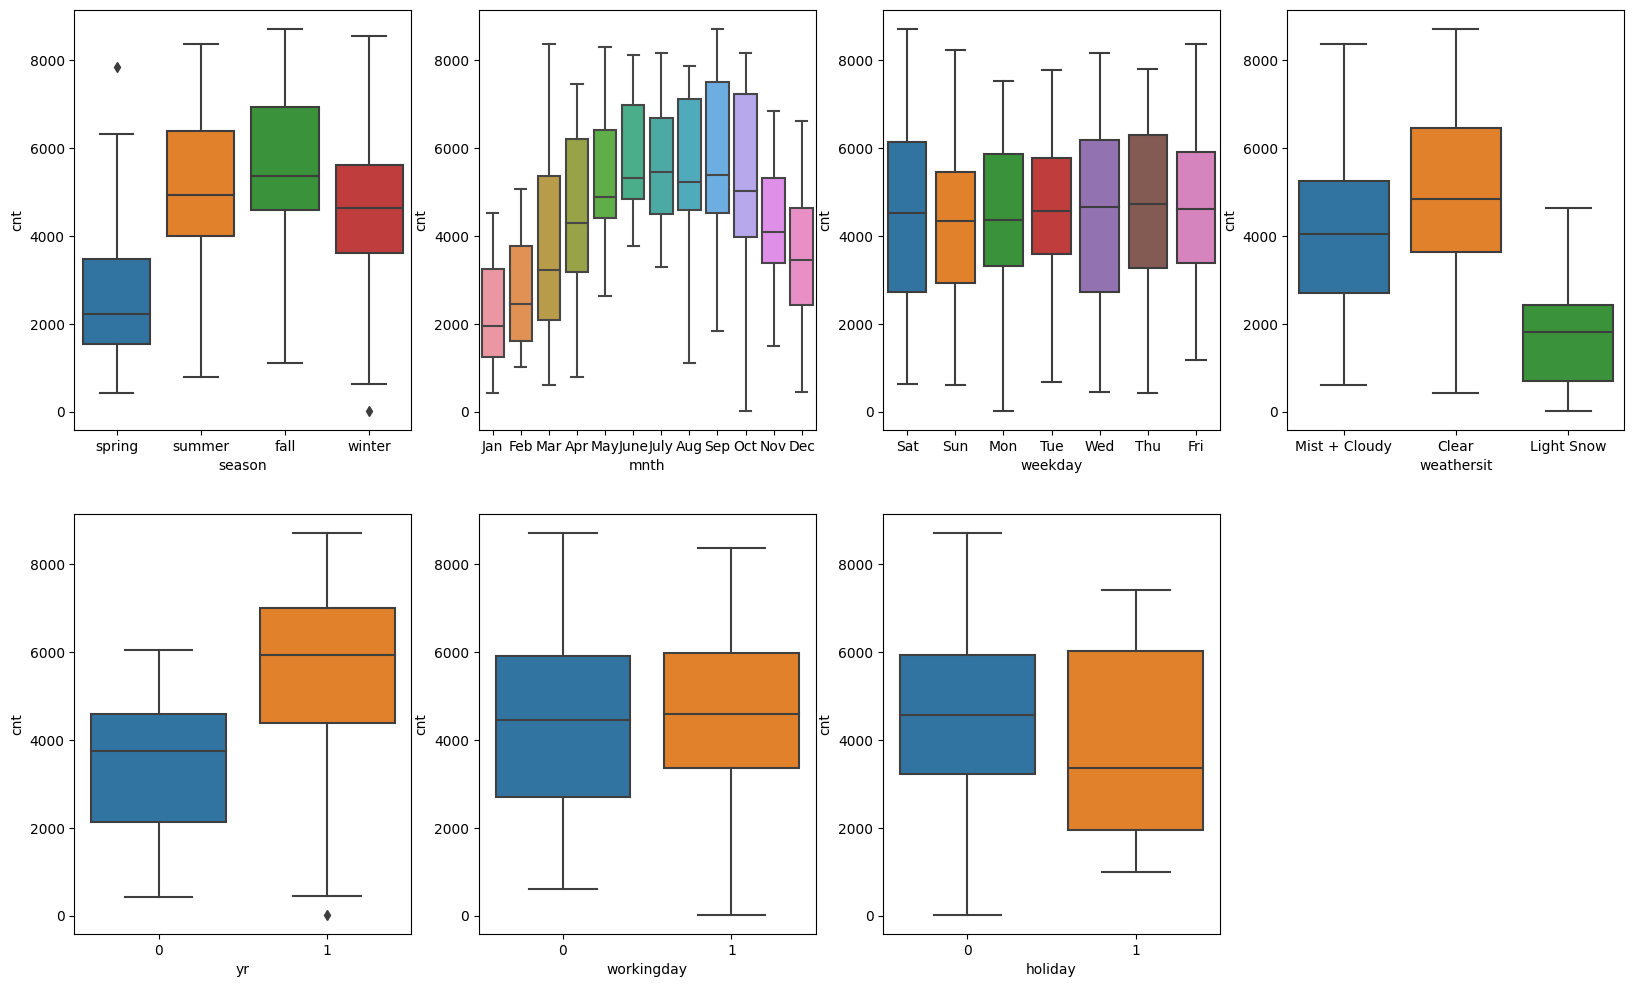

In [34]:
#Plotting categorical variables before treating them with new metrics for Modelling
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bikeSharing)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=bikeSharing)
plt.show()

<font color ="blue"> <H4>Inferences</H4>
1.2019 vehicles have seen higher demand over 2018</br>
2.Higher bike rentals during holidays
</br>3.Higher bike rentals during Clear weather
</br>4.Higher bike rentals during Wednesday, Thursday and Saturday. Thereby no big differnce in bike usage between working day and non working day
</br>5.Higher bike rentals during July, August, September and October
</br>6.Higher bike rentals during Summer and Fall
</font>

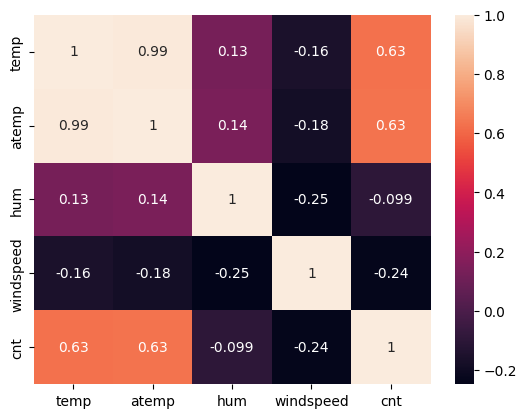

In [36]:
#pairwise correlations on continuous variables
sns.heatmap(bikeSharing[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

<font color ="blue"><H3>Inference:</H3>
1. atemp and temp are establish collinearity. one can be replaced by another
2. cnt establishes linear relationship with temp, atemp (based on scatter plots)
3. Lower humidity values doesn't have cnt implying there's a threshold around 25. the case is vice versa with windspeed where there is a cpa beyond 30
4. Similar trend is seen with distribution as well; cnt establishes normal distribution, windspeed - left skewed and humidity - right skewed
</font>

In [37]:
#Assessing correlation to decide removal of atemp. If not adjusted R^2 can also be used later
bikeSharing['temp'].corr(bikeSharing['atemp'])

0.991696178690565

In [38]:
#Assessing characteristics after introducing new variables and removing atemp
bikeSharing = bikeSharing.drop(['atemp'],axis=1)
bikeSharing.shape

(730, 11)

<H3> Data Preparation for Linear Regresssion </H3>

In [39]:
#Introducing dummy variables for modeling. Each of the categorical variables are segmented into 0s and 1s
month = pd.get_dummies(bikeSharing.mnth, drop_first=True)
weekday = pd.get_dummies(bikeSharing.weekday, drop_first=True)
weathersit = pd.get_dummies(bikeSharing.weathersit, drop_first=True)
season = pd.get_dummies(bikeSharing.season, drop_first=True)
bikeSharing = pd.concat([bikeSharing,month,weekday,weathersit,season],axis=1)

In [40]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [42]:
bikeSharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'Aug', 'Dec', 'Feb',
       'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter'],
      dtype='object')

In [43]:
bikeSharing.shape

(730, 33)

In [ ]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

<H3>Model building and evaluation </H3>

In [44]:
#Target variable
y = bikeSharing.pop('cnt')

#Independent variables
X = bikeSharing

#Train and Test data split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100 )

In [47]:
print(X_train.shape)
print(X_test.shape)

(510, 32)
(220, 32)


<H3> Feature Scaling </H3>

In [46]:
#Assessing values to decide scale
X.describe()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,0.084932,0.084932,0.076712,0.084932,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,0.278971,0.278971,0.266317,0.278971,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<font color ="blue"><h3>Inference:</h3>
1. The new categorical variables are between 0 and 1
2. Whereas temp, hum, windspeed and cnt are in the ranges of 2-35, 0 - 97, 1.5 - 34, 22 - 8714
Min max scaler can be used to scale these values to be between 0 and 1</font>

In [49]:
scaler = MinMaxScaler()
scale_vars = ['hum','windspeed','temp']
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])

In [50]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.096078,0.084314,0.066667,0.088235,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.294988,0.278131,0.249689,0.283915,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
#Dropping categorical variables for further cleaning
X_train.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)
X_test.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)
X_train.dtypes

yr                 int64
holiday            int64
workingday         int64
temp             float64
hum              float64
windspeed        float64
Aug                uint8
Dec                uint8
Feb                uint8
Jan                uint8
July               uint8
June               uint8
Mar                uint8
May                uint8
Nov                uint8
Oct                uint8
Sep                uint8
Mon                uint8
Sat                uint8
Sun                uint8
Thu                uint8
Tue                uint8
Wed                uint8
Light Snow         uint8
Mist + Cloudy      uint8
spring             uint8
summer             uint8
winter             uint8
dtype: object

<H3>RFE method for Feature Elimination</H3>

In [58]:
#Build a Linear model using sklearn and RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

<H3>VIF - Manual Elimination method </H3>

In [64]:
def model_build(cols):
  X_train_sm = sm.add_constant(X_train[cols])
  lm = sm.OLS(y_train,X_train_sm).fit()
  print(lm.summary())
  return lm

In [67]:
def apply_vif(cols):
  df1 = X_train[cols]
  vif = pd.DataFrame()
  vif['Features'] = df1.columns
  vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
  vif['VIF'] = round(vif['VIF'],2)
  print(vif.sort_values(by='VIF',ascending = False))

In [68]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [69]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [70]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter']]

In [71]:
X_train_rfe.shape

(510, 15)

<H3> Build Model </H3>

<H4>Model-1

In [73]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.22e-191
Time:                        16:49:40   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2211.4527    314.189      7.039

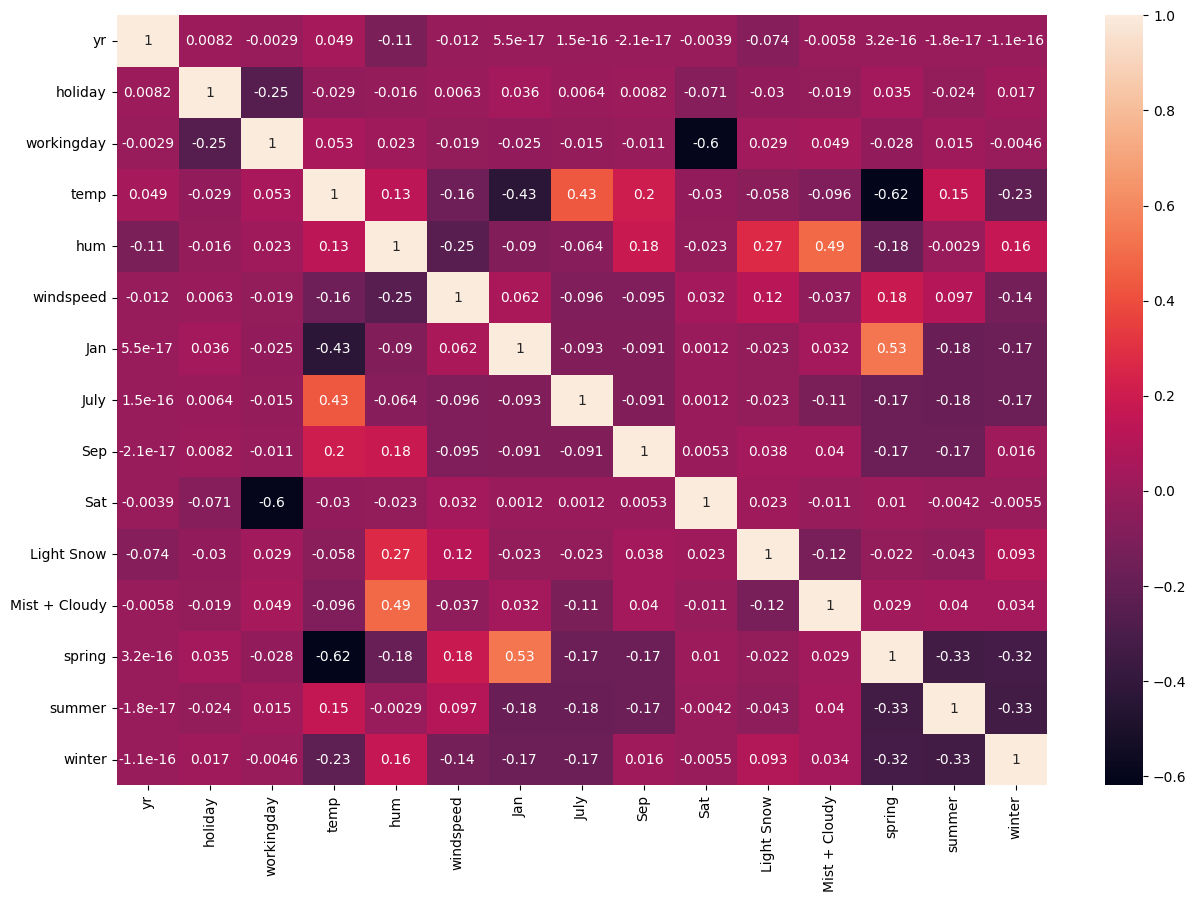

In [74]:
# Checking correlation of features selected by RFE with target column.
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter']].corr(), annot=True)
plt.show()

<H4>Model-2</H4>

In [75]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.11e-191
Time:                        17:02:39   Log-Likelihood:                -4108.2
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2109.4938    310.905      6.785

<H4>Model-3</H4>

In [76]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.28e-188
Time:                        17:03:28   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1391.5045    267.191      5.208

<H4>Model 4</H4>

In [77]:
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.54e-191
Time:                        17:04:43   Log-Likelihood:                -4110.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     496   BIC:                             8309.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2026.8932    309.793      6.543

<H4>Model-5</H4>

In [79]:
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
        'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.1
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          7.35e-191
Time:                        17:08:17   Log-Likelihood:                -4115.1
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     497   BIC:                             8311.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1913.2880    309.749      6.177

In [80]:
cols = ['yr', 'workingday', 'windspeed',
        'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          5.49e-151
Time:                        17:12:44   Log-Likelihood:                -4215.0
No. Observations:                 510   AIC:                             8452.
Df Residuals:                     499   BIC:                             8499.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4628.2129    158.141     29.266

In [81]:
cols = ['yr', 'workingday', 'windspeed',
        'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'July',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     161.8
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.55e-149
Time:                        17:13:42   Log-Likelihood:                -4218.4
No. Observations:                 510   AIC:                             8459.
Df Residuals:                     499   BIC:                             8505.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4445.0420    155.515     28.583

In [82]:
cols = ['yr', 'workingday', 'July',
        'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     151.2
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.85e-144
Time:                        17:14:51   Log-Likelihood:                -4231.4
No. Observations:                 510   AIC:                             8485.
Df Residuals:                     499   BIC:                             8531.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4246.5665    164.412     25.829

In [85]:
cols = ['yr', 'workingday',
        'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer','Sun',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     152.5
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          9.78e-145
Time:                        17:16:55   Log-Likelihood:                -4229.8
No. Observations:                 510   AIC:                             8482.
Df Residuals:                     499   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3752.4349    293.939     12.766

In [87]:
cols = ['yr', 'temp','July',
        'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'Sun',
       'winter']
model_build(cols)
apply_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.1
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          6.47e-181
Time:                        17:21:30   Log-Likelihood:                -4147.1
No. Observations:                 510   AIC:                             8314.
Df Residuals:                     500   BIC:                             8357.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1759.9299    193.483      9.096

<font color ="blue">Inference:
R2 is 0.821. There are no insignificant variables and no multicollinear variables
Also R2 and adjusted R2 is very close, which means no parameter can be removed further from this model

In [88]:
cols = ['yr', 'temp','July',
        'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'Sun',
       'winter']

lr1 = LinearRegression()
lr1.fit(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1203359806998129.0 [ 2.02012670e+03 -1.20335981e+15 -1.20335981e+15  3.87085149e+03
 -1.31698757e+03 -1.61716434e+03  1.77109834e+02 -3.85130288e+02
 -2.82062497e+02 -5.50412751e+02 -2.94526618e+02  4.00094312e+01
  1.09383040e+01  2.14607251e+02 -3.46543261e+02  6.57517526e+01
  7.46473755e+02 -1.81625000e+02 -1.20335981e+15 -1.20335981e+15
 -7.96250000e+01 -1.55821289e+02 -4.76914062e+01 -2.22356250e+03
 -5.17593750e+02 -3.89687500e+02  3.73500000e+02  9.35312500e+02]


<H3> Model Evaluation </H3>

In [93]:
y_train_pred = lr1.predict(X_train[cols])

Text(0.5, 0, 'Errors')

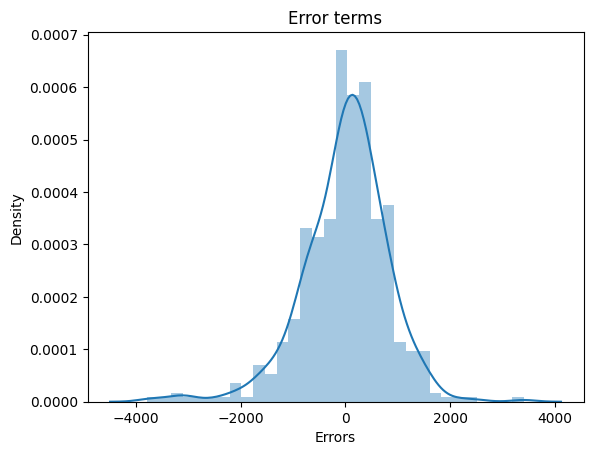

In [94]:
sns.distplot(y_train-y_train_pred)
plt.title('Error terms')
plt.xlabel('Errors')

In [95]:
r2_score(y_train,y_train_pred)

0.8217333159960296

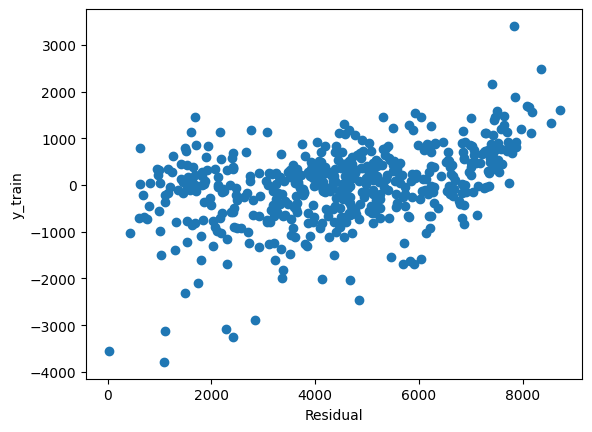

In [96]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [101]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

Text(0, 0.5, 'y_train_pred')

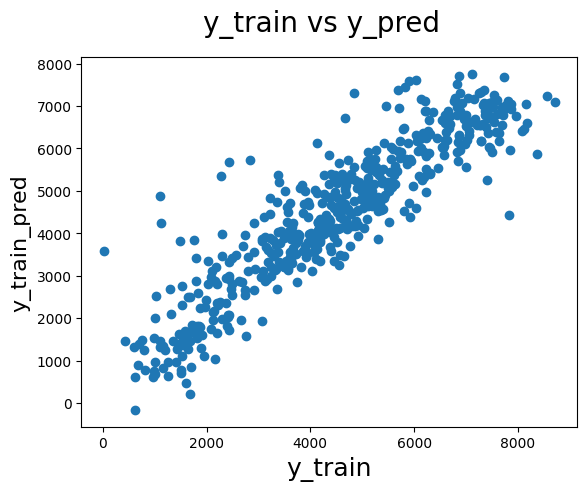

In [107]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)
plt.xlabel('y_train', fontsize = 18)
plt.ylabel('y_train_pred', fontsize = 16)

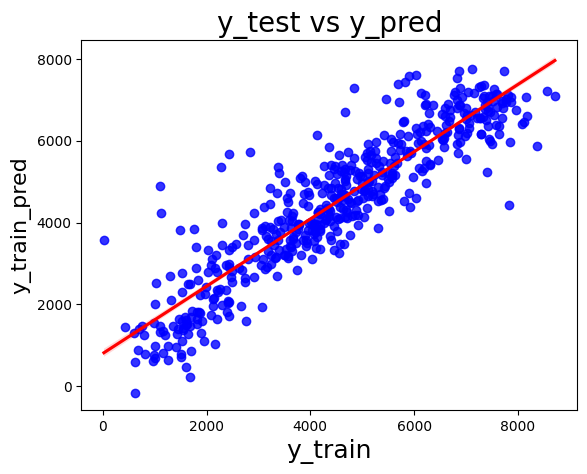

In [109]:
plt.figure()
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()

In [ ]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.46e-61
Time:                        23:20:12   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#adding variable yr and checking to see if it improves the R-squared
X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.34e-130
Time:                        23:20:12   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.00e-181
Time:                        23:20:12   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.88e+15
================================================================

Inference: 85% of variance in cnt is explained by all the variables

C:\Users\skgan\AppData\Local\Temp\ipykernel_26720\1633242945.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


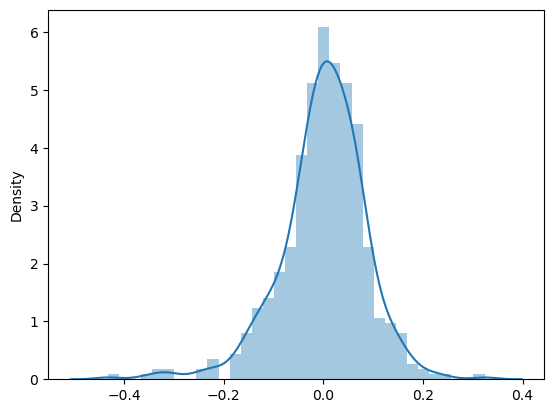

In [ ]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.show()

In [ ]:
#adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.params


const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
July            -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
spring          -0.050897
summer           0.050762
winter           0.093301
dtype: float64

In [ ]:
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          4.22e-191
Time:                        23:20:12   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression Equation
1. using iterative method: 0.2431 + 0.2324*year + 0.010*holiday + 0.4454*temp - 0.1515*hum -0.1860*windspeed + 0.0204*Aug - 0.0443*Dec - 0.032*Feh - 0.063*Jan - 0.033*July + 0.004*June + 0.0013*Mar + 0.023* May - 0.0399*Nov + 0.0075*Oct + 0.0859*Sept + 0.041*sun - 0.0091*Thu - 0.018*Tue - 0.0055*Wed - 0.2558*Light snow - 0.0596*Mist - 0.0448*spring + 0.030*summer + 0.108*winter
2. Using RFE : 0.1509 + 0.2336	* year  -0.0987 * holiday +	0.4774 * temp -0.0261* Jan + 0.0949*Sep - 0.3011 * Light Snot - 0.0764* Mist - 0.0616 * spring + 0.0495* summer + 0.0913*winter


Inference
1. Temperature affects the Business positively,
2. Raining, Humidity, Windspeed and Cloudy affects the Business negatively.
3. The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.
4. Saturday rentals are more than other usual Days
5. High demand in 2019 than 2018


In [111]:
r2_score(y_train,y_train_pred)

0.8217333159960296